### Import Libreraies

In [105]:
import pandas as pd 
import os
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing

import numpy as np

import time

from subprocess import check_output

### import CSV file

In [106]:
data = pd.read_csv("data_agriculture.csv", engine='python', index_col=0)
data.head()

,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,paCropName,paCropSpeId
idx,,,,,,,,,,,
1,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN
2,2017-01-05,춘천,74,2,1,7,52,0,0,들깨,PA100101
3,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN
4,2017-01-27,춘천,62,-1,2,2,33,5,8,들깨,PA100101
5,2017-01-07,춘천,89,0,0,7,54,0,4,들깨,PA100101


### Cleanining data with Panda

### sumary of datas 
What are the features?
What are the expected types (int, float, string, boolean)?
Is there obvious missing data (v
alues that Pandas can detect)?
Is there other types of missing data that’s not so obvious (can’t easily detect with Pandas)?

In [107]:
null_df = data[data.isna().any(axis = 1)]

data = data.dropna(how='any')

In [108]:
### check data type
for Month, dtype in data.dtypes.iteritems():
    print(Month, dtype)

date object
area object
dayAvgRhm int64
dayAvgTa int64
dayAvgWs int64
dayMaxTa int64
dayMinRhm int64
daySumRn int64
daySumSs int64
paCropName object
paCropSpeId object


In [109]:
### detect missing value 
data.isnull().any()

date           False
area           False
dayAvgRhm      False
dayAvgTa       False
dayAvgWs       False
dayMaxTa       False
dayMinRhm      False
daySumRn       False
daySumSs       False
paCropName     False
paCropSpeId    False
dtype: bool

In [110]:
data["area"].isnull()
data["date"].isnull()
data["date"]

idx
2       2017-01-05
4       2017-01-27
5       2017-01-07
7       2017-01-03
9       2017-01-06
           ...    
5669    2020-12-18
5670    2020-12-06
5671    2020-12-31
5672    2020-12-11
5673    2020-12-08
Name: date, Length: 3772, dtype: object

### puting standard missing type in a list

In [111]:
#missing_value = ["n/a", "na", "-"]
missing_value = ["NaN"]
data = data = pd.read_csv("data_agriculture.csv", engine='python', na_values = missing_value)

In [112]:
data = data.dropna()

### unexpected missing data
For example, if our feature is expected to be a string, but there’s a numeric type, then technically this is also a missing value.

###Detecting another data type
cnt=0
for row in data['dayAvgTa']:
    try:
        int(row)
        data.loc[cnt, 'dayAvgTa']=np.nan
    except ValueError:
        pass
    cnt+=1

In [113]:
data.isnull().sum()

idx            0
date           0
area           0
dayAvgRhm      0
dayAvgTa       0
dayAvgWs       0
dayMaxTa       0
dayMinRhm      0
daySumRn       0
daySumSs       0
paCropName     0
paCropSpeId    0
dtype: int64

In [114]:
data.isnull().values.any()

False

In [115]:
### Total number of missing value
data.isnull().sum().sum()

0

### remplacing missing values 

df['ST_NUM'].fillna(125, inplace=True)

# Location based replacement
df.loc[2,'ST_NUM'] = 125

# Replace using median 
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

### inputing binaries in type column

In [116]:
data['area_id'] = data['area']

In [117]:
data.loc[data['area'] == '춘천', 'area_id'] = 0   ##춘천 == 0
data.loc[data['area'] == '제주', 'area_id'] = 1   ##제주 == 1
data.loc[data['area'] == '평택', 'area_id'] = 2   ##제주 == 2

In [118]:
data['crop_id'] = data['paCropName']

In [119]:
data.loc[data['paCropName'] == '쪽파', 'crop_id'] = -1   ##춘천 == 0
data.loc[data['paCropName'] == '들깨', 'crop_id'] = 0   ##제주 == 1
data.loc[data['paCropName'] == '무', 'crop_id'] = 1   ##제주 == 2

### Data Preparation

def wrangle (df): # create a functon in which we will call the data
    df = df.copy()   # we copy the data not to corrupt the original
    
    df = df.drop(columns = ['paCropSpeId', 'daySumSs', 'daySumRn'], axis=0) #remove columns with none common values 
    df["date"] = pd.to_datetime(df["date"])


In [120]:
#print( df[data.dayAvgTa > 18])
data.columns

Index(['idx', 'date', 'area', 'dayAvgRhm', 'dayAvgTa', 'dayAvgWs', 'dayMaxTa',
       'dayMinRhm', 'daySumRn', 'daySumSs', 'paCropName', 'paCropSpeId',
       'area_id', 'crop_id'],
      dtype='object')

In [121]:
#data = wrangle(data)

In [122]:
data.shape

(3772, 14)

### Correlation visualization

target = 'dayMaxTa'
data['target'] = np.where(data['dayMaxTa']==15, 16, 17)
##inputing binaries in type column
data.loc[data['area'] == '춘천', 'area'] = 0   ##춘천 == 0
data.loc[data['area'] == '제주', 'area'] = 1   ##제주 == 1
data.loc[data['area'] == '평택', 'area'] = 2   ##제주 == 2

### Separating Target from Features

In [123]:
#Target 
target = 'dayMaxTa'
Y = data[target]
#features
x = data[["area", "dayAvgRhm", "dayAvgTa"]]

In [124]:
#Train Test our features and target
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x, Y, test_size=0.25, random_state = 42)

In [125]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(2829, 3)
(943, 3)
(2829,)
(943,)


### Establish Baseline Mean Error 

In [126]:
from sklearn.metrics import mean_absolute_error
y_pred = [Y_train.mean()] * len(Y_train)

print('BaseLine MAE: ', round(mean_absolute_error(Y_train, y_pred), 5))

BaseLine MAE:  8.20127


In [127]:
data['dayAvgTa'].unique()

array([  2,  -1,   0,   3,   1,  -3,  -2,   5,  -5,  -7,  -4,  -9, -10,
         4,  -6,   8,   6,   9,   7,  13,  14,  17,  11,  10,  12,  18,
        16,  15,  22,  20,  19,  23,  21,  26,  25,  24,  27,  28,  29,
        -8, -11, -14, -12,  30,  32,  31], dtype=int64)

### Feature engineering & Label classification // Transform our problem into multi label classification 

In [193]:
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance 
from skmultilearn.problem_transform import ClassifierChain 
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

data['CAN_PRODUCE'] = data.loc[data.dayAvgTa == 15, 'CAN_PRODUCE'] = "Yes"
data['CAN_PRODUCE'] = data.loc[data.dayAvgTa == 16, 'CAN_PRODUCE'] = "Yes"
data['CAN_PRODUCE'] = data.loc[data.dayAvgTa == 17, 'CAN_PRODUCE'] = "Yes"
data['CAN_PRODUCE'] = data.loc[data.dayAvgTa == 18, 'CAN_PRODUCE'] = "Yes"
data['CAN_PRODUCE'] = data.loc[data.dayAvgTa == 15, 'CAN_PRODUCE'] = "Yes"

In [194]:
#Transform string to day time
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data.date.head()

1   2017-01-05
3   2017-01-27
4   2017-01-07
6   2017-01-03
8   2017-01-06
Name: date, dtype: datetime64[ns]

In [195]:
#Getting month
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [196]:
data.groupby('month').size()

month
1     355
2     294
3     332
4     312
5     316
6     283
7     302
8     300
9     289
10    325
11    326
12    338
dtype: int64

In [197]:
data

,idx,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,paCropName,paCropSpeId,area_id,crop_id,month,day,CAN_PRODUCE,OUTPUT_LABEL
1,2,2017-01-05,춘천,74,2,1,7,52,0,0,들깨,PA100101,0,0,1,5,False,0
3,4,2017-01-27,춘천,62,-1,2,2,33,5,8,들깨,PA100101,0,0,1,27,False,0
4,5,2017-01-07,춘천,89,0,0,7,54,0,4,들깨,PA100101,0,0,1,7,False,0
6,7,2017-01-03,춘천,78,0,1,7,31,0,5,들깨,PA100101,0,0,1,3,False,0
8,9,2017-01-06,춘천,77,3,0,10,41,0,7,들깨,PA100101,0,0,1,6,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668,5669,2020-12-18,제주,57,7,3,10,42,0,1,쪽파,PA290101,1,-1,12,18,False,0
5669,5670,2020-12-06,제주,60,8,1,11,48,0,8,쪽파,PA290101,1,-1,12,6,False,0
5670,5671,2020-12-31,제주,68,2,6,4,49,3,0,쪽파,PA290101,1,-1,12,31,False,0
5671,5672,2020-12-11,제주,68,11,1,12,57,0,0,쪽파,PA290101,1,-1,12,11,False,0


### spacies can produce

In [203]:
def calc_prevalence(y):
    return (sum(y)/len(y))

In [204]:
#data['CAN_PRODUCE'] = data.paCropName.isin(['무']) & (data.dayAvgTa < 21) & (data.dayAvgTa > 14) & data['CAN_PRODUCE'] & data.paCropName.isin(['들깨']) & (data.month < 7) & (data.month > 4)   

In [205]:
data['CAN_PRODUCE'] = data.paCropName.isin(['들깨']) & (data.month < 7) & (data.month > 4)    
type(data['CAN_PRODUCE'])

pandas.core.series.Series

In [206]:
data['OUTPUT_LABEL'] = (data['CAN_PRODUCE']).astype('int')

In [207]:
calc_prevalence(data.OUTPUT_LABEL.values)

0.0535524920466596

In [189]:
data.head(1100)

,idx,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,paCropName,paCropSpeId,area_id,crop_id,month,day,CAN_PRODUCE,OUTPUT_LABEL
1,2,2017-01-05,춘천,74,2,1,7,52,0,0,들깨,PA100101,0,0,1,5,False,0
3,4,2017-01-27,춘천,62,-1,2,2,33,5,8,들깨,PA100101,0,0,1,27,False,0
4,5,2017-01-07,춘천,89,0,0,7,54,0,4,들깨,PA100101,0,0,1,7,False,0
6,7,2017-01-03,춘천,78,0,1,7,31,0,5,들깨,PA100101,0,0,1,3,False,0
8,9,2017-01-06,춘천,77,3,0,10,41,0,7,들깨,PA100101,0,0,1,6,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1319,2020-06-24,춘천,86,21,1,25,66,46,0,들깨,PA100101,0,0,6,24,True,1
1319,1320,2020-06-04,춘천,68,24,2,29,45,0,10,들깨,PA100101,0,0,6,4,True,1
1320,1321,2020-06-03,춘천,66,22,1,29,40,0,12,들깨,PA100101,0,0,6,3,True,1
1321,1322,2020-06-22,춘천,54,27,1,36,22,0,13,들깨,PA100101,0,0,6,22,True,1


### ploting and feature selection

In [190]:
y = data.OUTPUT_LABEL
list = ['dayAvgTa', 'OUTPUT_LABEL']
ax = sns.countplot(y, label="Count")
T, F = y.value_counts()
print('can be planted: ',1 )
print('can not be planted', 0)

NameError: name 'sns' is not defined

In [1027]:
x = data.drop(list, axis = 1)
x.describe()

,idx,dayAvgRhm,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,area_id,crop_id,month,day
count,3772.000000,3772.000000,3772.000000,3772.00000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,2696.262725,68.520679,1.637328,17.98701,44.578738,2.994963,3.659332,0.990456,-0.019353,6.487805,15.311241
std,1771.076149,13.902084,1.188858,9.63616,17.057032,12.399315,4.154955,0.810573,0.816430,3.524902,8.718750
min,2.000000,0.000000,0.000000,-9.00000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.000000
25%,1145.750000,59.000000,1.000000,10.00000,32.000000,0.000000,0.000000,0.000000,-1.000000,3.000000,8.000000
50%,2410.500000,69.000000,1.000000,19.00000,45.000000,0.000000,1.000000,1.000000,0.000000,6.000000,15.000000
75%,4522.250000,78.000000,2.000000,26.00000,55.000000,0.000000,7.000000,2.000000,1.000000,10.000000,23.000000
max,5673.000000,100.000000,11.000000,39.00000,99.000000,265.000000,13.000000,2.000000,1.000000,12.000000,31.000000


In [1028]:
data.groupby('month').apply(lambda g: calc_prevalence(g.OUTPUT_LABEL.values))

month
1     0.000000
2     0.000000
3     0.003012
4     0.060897
5     0.275316
6     0.060071
7     0.009934
8     0.010000
9     0.173010
10    0.132308
11    0.006135
12    0.000000
dtype: float64

### split sample  

In [1029]:
#shuffling
data = data.sample(n = len(data), random_state = 42)
data = data.reset_index(drop = True)

data_valid = data.sample(frac = 0.3, random_state = 42)
data_train = data.drop(data_valid.index)

In [1030]:
### Checking relevance 
print('Valid prevalence(n = %d):%.3f'%(len(data_valid),calc_prevalence(data_valid.OUTPUT_LABEL.values)))
print('Train prevalence(n = %d):%.3f'%(len(data_train), calc_prevalence(data_train.OUTPUT_LABEL.values)))

Valid prevalence(n = 1132):0.058
Train prevalence(n = 2640):0.060


In [1031]:
#features to use
col2use = ['area_id', 'dayAvgTa', 'dayMaxTa', 'day', 'month', 'crop_id']

### build our X (inputs) and Y(output) for training and validation

In [1032]:
X_train = data_train[col2use].values
X_valid = data_valid[col2use].values

y_train = data_train['OUTPUT_LABEL'].values
y_valid = data_valid['OUTPUT_LABEL'].values
print('Training shapes:', X_train.shape, y_train.shape)
print('Validation shapes:', X_valid.shape, y_valid.shape)

Training shapes: (2640, 6) (2640,)
Validation shapes: (1132, 6) (1132,)


### Random Forest

In [1033]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 5, n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [1034]:
# get the prediction
y_train_preds = rf.predict_proba(X_train)[:,1]
y_valid_preds = rf.predict_proba(X_valid)[:,1]

### Evaluate Performance

In [1035]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

def calc_specificity(y_actual, y_pred, thresh):
 # calculates specificity
 return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)
def print_report(y_actual, y_pred, thresh):
 
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f' %accuracy)
    print('recall:%.3f' %recall)
    print('precision:%.3f' %precision)
    print('specificity:%.3f' %specificity)
    print('prevalence:%.3f' %calc_prevalence(y_actual))
    print('')
    return auc, accuracy, recall, precision, specificity

In [1036]:
#print repport 
thresh = 0.201
print('Random Forest')
print('Training: ')
print_report(y_train, y_train_preds, thresh);
print('Validation: ')
print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training: 
AUC:1.000
accuracy:0.996
recall:1.000
precision:0.941
specificity:0.996
prevalence:0.060

Validation: 
AUC:1.000
accuracy:0.996
recall:1.000
precision:0.930
specificity:0.995
prevalence:0.058



(1.0, 0.9955830388692579, 1.0, 0.9295774647887324, 0.9953095684803002)

### ploting 

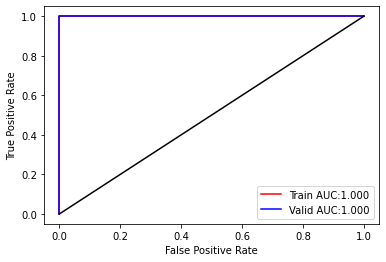

In [1037]:
### ROC curve 
from sklearn.metrics import roc_curve

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot([0,1],[0,1], 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

###  investigation  on Features

In [1050]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = col2use,columns=['importance']).sort_values('importance',ascending=False)
num = min([50,len(col2use)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = len[(feature_importances.iloc[:num]).index][::-1]
plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score — Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

TypeError: 'builtin_function_or_method' object is not subscriptable